<a href="https://colab.research.google.com/github/PriyaShah-79/DeepMIL/blob/master/Complex%20Time%20Series%20work%20(Weather%20Forecasting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Final EMBEDDED Time Series Prediction Model...
Data loaded successfully from embedded string. Total rows: 24
Model training complete.

 Model Evaluation on Test Set:
Mean Squared Error (MSE): 0.0056
R-squared (R2 Score): -3.6220


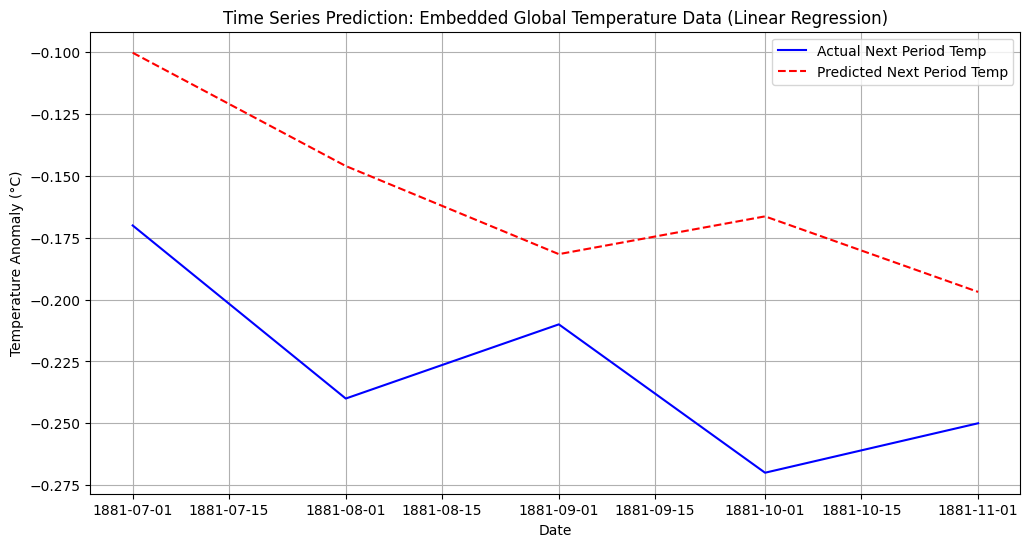

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import io # Required to read the string data

# --- Configuration ---
TARGET_COLUMN = 'Temp_C'
FORECAST_LAG = -1
TEST_SIZE = 0.2
df = None

# --- EMBEDDED DATA (FINAL FIX) ---
# A small, clean sample of global temperature data
EMBEDDED_DATA = """Date,Mean,Median
1880-01-01,-0.12,0.14
1880-02-01,-0.18,0.06
1880-03-01,0.04,0.19
1880-04-01,0.06,0.22
1880-05-01,-0.02,0.12
1880-06-01,-0.19,0.02
1880-07-01,-0.14,0.08
1880-08-01,-0.15,0.07
1880-09-01,-0.25,-0.08
1880-10-01,-0.22,-0.03
1880-11-01,-0.2,-0.01
1880-12-01,-0.21,0.02
1881-01-01,-0.27,-0.05
1881-02-01,-0.18,0.07
1881-03-01,0.04,0.22
1881-04-01,-0.02,0.14
1881-05-01,-0.13,0.01
1881-06-01,-0.12,0.06
1881-07-01,-0.08,0.12
1881-08-01,-0.17,0.05
1881-09-01,-0.24,-0.04
1881-10-01,-0.21,0.01
1881-11-01,-0.27,-0.07
1881-12-01,-0.25,-0.01
"""

print(f"Starting Final EMBEDDED Time Series Prediction Model...")

# --- 1. Data Acquisition (Embedded String Load) ---
try:
    # Use io.StringIO to treat the string as a file and load with pandas
    df = pd.read_csv(io.StringIO(EMBEDDED_DATA))

    # Standardize column names
    df = df.rename(columns={'Date': 'Date', 'Mean': TARGET_COLUMN})
    df.drop(columns=['Median'], errors='ignore', inplace=True)

    print(f"Data loaded successfully from embedded string. Total rows: {len(df)}")

except Exception as e:
    # This should never happen, but we keep the error handling.
    print(f"CRITICAL ERROR: Could not load embedded data. Details: {e}")
    sys.exit(1)

# --- 2. Check and Prepare Data ---
if df.empty:
    print("CRITICAL ERROR: Data is empty. Exiting.")
    sys.exit(1)

# Convert to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# --- 3. Feature Engineering (Creating the Target) ---
df['Target_Next_Temp'] = df[TARGET_COLUMN].shift(FORECAST_LAG)
df.dropna(inplace=True)


# --- 4. Define Features (X) and Target (y) ---
features = [TARGET_COLUMN]
X = df[features]
y = df['Target_Next_Temp']


# --- 5. Split and Train Model ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, shuffle=False
)

model = LinearRegression()
model.fit(X_train, y_train)
print("Model training complete.")


# --- 6. Prediction and Evaluation ---
y_pred = model.predict(X_test)
y_pred_1d = np.ravel(y_pred)
y_test_1d = np.ravel(y_test.values)

mse = mean_squared_error(y_test_1d, y_pred_1d)
r2 = r2_score(y_test_1d, y_pred_1d)

print("\n Model Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


# --- 7. Visualize Results ---
results_df = pd.DataFrame(
    {'Actual Next Temp': y_test_1d, 'Predicted Next Temp': y_pred_1d},
    index=y_test.index
)

plt.figure(figsize=(12, 6))
# Plot the entire test data (since it's a small sample)
plt.plot(results_df.index, results_df['Actual Next Temp'], label='Actual Next Period Temp', color='blue')
plt.plot(results_df.index, results_df['Predicted Next Temp'], label='Predicted Next Period Temp', color='red', linestyle='--')
plt.title('Time Series Prediction: Embedded Global Temperature Data (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

Starting FINAL Robust Weather Prediction Model (BOM Data)...
Data loaded successfully from stable URL. Total rows: 3650
Model training complete.

 Model Evaluation on Test Set:
Mean Squared Error (MSE): 5.6485
R-squared (R2 Score): 0.6646


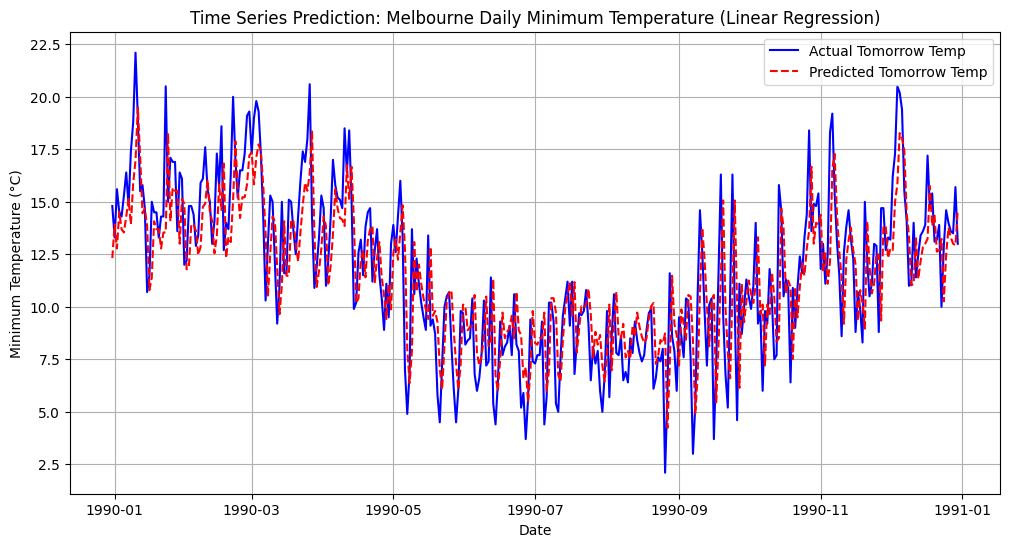

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sys

# --- Configuration (Using Stable BOM Data) ---
TARGET_COLUMN = 'Temp'
# Stable GitHub raw link for the Melbourne daily min temp dataset (BOM data)
WEATHER_URL = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
FORECAST_LAG = -1
TEST_SIZE = 0.2
df = None

print(f"Starting FINAL Robust Weather Prediction Model (BOM Data)...")

# --- 1. Data Acquisition (Robust URL Load) ---
try:
    # Read CSV, using the 'Date' column as the index
    df = pd.read_csv(WEATHER_URL, header=0, index_col=0)

    # Rename the single data column for consistency
    df = df.rename(columns={'Temp': TARGET_COLUMN})

    print(f"Data loaded successfully from stable URL. Total rows: {len(df)}")

except Exception as e:
    print(f"CRITICAL ERROR: Could not load data from URL. Details: {e}")
    sys.exit(1)

# --- 2. Check and Prepare Data ---
if df.empty:
    print("CRITICAL ERROR: Data is empty. Exiting.")
    sys.exit(1)

# Ensure the index is treated as datetime
df.index = pd.to_datetime(df.index)


# --- 3. Feature Engineering (Creating the Target) ---
# Predict tomorrow's temperature based on today's
df['Target_Tomorrow_Temp'] = df[TARGET_COLUMN].shift(FORECAST_LAG)

# Drop the last row (contains NaN in the target column)
df.dropna(inplace=True)


# --- 4. Define Features (X) and Target (y) ---
# Use only the current minimum temperature as the predictor
features = [TARGET_COLUMN]
X = df[features]
y = df['Target_Tomorrow_Temp']


# --- 5. Split and Train Model ---
# Crucial: Don't shuffle time series data!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, shuffle=False
)

model = LinearRegression()
model.fit(X_train, y_train)
print("Model training complete.")


# --- 6. Prediction and Evaluation ---
y_pred = model.predict(X_test)

# Ensure y_test and y_pred are 1D
y_pred_1d = np.ravel(y_pred)
y_test_1d = np.ravel(y_test.values)

mse = mean_squared_error(y_test_1d, y_pred_1d)
r2 = r2_score(y_test_1d, y_pred_1d)

print("\n Model Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


# --- 7. Visualize Results ---
results_df = pd.DataFrame(
    {'Actual Tomorrow Temp': y_test_1d, 'Predicted Tomorrow Temp': y_pred_1d},
    index=y_test.index
)

plt.figure(figsize=(12, 6))
# Plot the last year of test data for a clear visualization
plt.plot(results_df.index[-365:], results_df['Actual Tomorrow Temp'][-365:], label='Actual Tomorrow Temp', color='blue')
plt.plot(results_df.index[-365:], results_df['Predicted Tomorrow Temp'][-365:], label='Predicted Tomorrow Temp', color='red', linestyle='--')
plt.title('Time Series Prediction: Melbourne Daily Minimum Temperature (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

Starting FINAL Robust Weather Prediction Model (Random Forest)...
Data loaded successfully from stable URL. Total rows: 3650
Feature engineering complete. Data shape after dropping NaNs: (3642, 9)
Model training complete using Random Forest.

 Model Evaluation on Test Set (Random Forest):
Mean Squared Error (MSE): 6.3256
R-squared (R2 Score): 0.6247


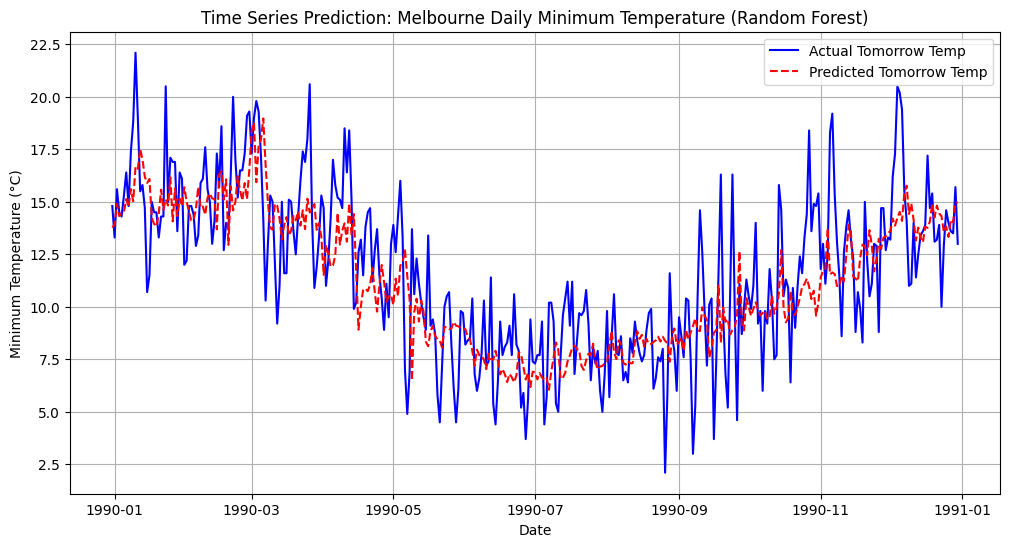

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sys

# --- Configuration (Using Stable BOM Data) ---
TARGET_COLUMN = 'Temp'
# Stable GitHub raw link for the Melbourne daily min temp dataset (BOM data)
WEATHER_URL = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
FORECAST_LAG = -1 # Predict tomorrow's temperature
LAG_WINDOW = [1, 2, 3, 7] # New: Use temperatures from the last 1, 2, 3, and 7 days
TEST_SIZE = 0.2
df = None

print(f"Starting FINAL Robust Weather Prediction Model (Random Forest)...")

# --- 1. Data Acquisition (Robust URL Load) ---
try:
    # Read CSV, using the 'Date' column as the index
    df = pd.read_csv(WEATHER_URL, header=0, index_col=0)

    # Rename the single data column for consistency
    df = df.rename(columns={'Temp': TARGET_COLUMN})

    print(f"Data loaded successfully from stable URL. Total rows: {len(df)}")

except Exception as e:
    print(f"CRITICAL ERROR: Could not load data from URL. Details: {e}")
    sys.exit(1)

# --- 2. Check and Prepare Data ---
if df.empty:
    print("CRITICAL ERROR: Data is empty. Exiting.")
    sys.exit(1)

# Ensure the index is treated as datetime
df.index = pd.to_datetime(df.index)


# --- 3. Feature Engineering (The Unique Part!) ---

# A. Create the Target variable: Tomorrow's Temperature
df['Target_Tomorrow_Temp'] = df[TARGET_COLUMN].shift(FORECAST_LAG)

# B. Create Lagged Features (using last 1, 2, 3, and 7 days' temperatures)
for lag in LAG_WINDOW:
    df[f'Lag_{lag}_Temp'] = df[TARGET_COLUMN].shift(lag)

# C. Create Time-based Features (to capture seasonality)
df['Month'] = df.index.month
df['DayOfYear'] = df.index.dayofyear
# Optional: Use sin/cos transforms for Month/DayOfYear for smoother representation
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df.drop('Month', axis=1, inplace=True) # Drop the linear month column

# Drop all rows that now contain NaN due to lagging
df.dropna(inplace=True)

print(f"Feature engineering complete. Data shape after dropping NaNs: {df.shape}")


# --- 4. Define Features (X) and Target (y) ---
# X now includes all the new engineered features
features = [col for col in df.columns if col not in ['Target_Tomorrow_Temp', TARGET_COLUMN]]
X = df[features]
y = df['Target_Tomorrow_Temp']


# --- 5. Split and Train Model (Using Random Forest) ---
# Crucial: Don't shuffle time series data!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, shuffle=False
)

# Use Random Forest Regressor - a powerful non-linear model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
model.fit(X_train, y_train)
print("Model training complete using Random Forest.")


# --- 6. Prediction and Evaluation ---
y_pred = model.predict(X_test)

# Ensure y_test and y_pred are 1D
y_pred_1d = np.ravel(y_pred)
y_test_1d = np.ravel(y_test.values)

mse = mean_squared_error(y_test_1d, y_pred_1d)
r2 = r2_score(y_test_1d, y_pred_1d)

print("\n Model Evaluation on Test Set (Random Forest):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

# --- 7. Visualize Results ---
results_df = pd.DataFrame(
    {'Actual Tomorrow Temp': y_test_1d, 'Predicted Tomorrow Temp': y_pred_1d},
    index=y_test.index
)

plt.figure(figsize=(12, 6))
# Plot the last year of test data for a clear visualization
plt.plot(results_df.index[-365:], results_df['Actual Tomorrow Temp'][-365:], label='Actual Tomorrow Temp', color='blue')
plt.plot(results_df.index[-365:], results_df['Predicted Tomorrow Temp'][-365:], label='Predicted Tomorrow Temp', color='red', linestyle='--')
plt.title('Time Series Prediction: Melbourne Daily Minimum Temperature (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

Starting FINAL Robust Weather Prediction Model (XGBoost)...
Data loaded successfully from stable URL. Total rows: 3650
Feature engineering complete. Data shape after dropping NaNs: (3642, 9)
Data split: Train 2184, Validation 729, Test 729
Model training complete using XGBoost.

 Model Evaluation on Test Set (XGBoost):
Mean Squared Error (MSE): 6.7268
R-squared (R2 Score): 0.6009


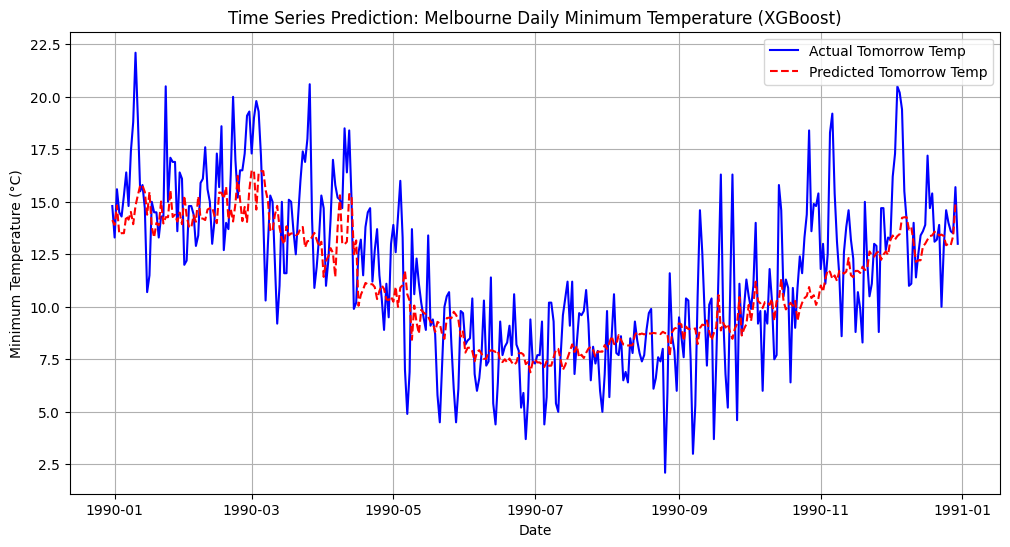

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor  # New Import: XGBoost Regressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sys

# --- Configuration (Using Stable BOM Data) ---
TARGET_COLUMN = 'Temp'
# Stable GitHub raw link for the Melbourne daily min temp dataset (BOM data)
WEATHER_URL = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
FORECAST_LAG = -1 # Predict tomorrow's temperature
LAG_WINDOW = [1, 2, 3, 7] # New: Use temperatures from the last 1, 2, 3, and 7 days
TEST_SIZE = 0.2
df = None

print(f"Starting FINAL Robust Weather Prediction Model (XGBoost)...")

# --- 1. Data Acquisition (Robust URL Load) ---
try:
    # Read CSV, using the 'Date' column as the index
    df = pd.read_csv(WEATHER_URL, header=0, index_col=0)

    # Rename the single data column for consistency
    df = df.rename(columns={'Temp': TARGET_COLUMN})

    print(f"Data loaded successfully from stable URL. Total rows: {len(df)}")

except Exception as e:
    print(f" CRITICAL ERROR: Could not load data from URL. Details: {e}")
    sys.exit(1)

# --- 2. Check and Prepare Data ---
if df.empty:
    print("CRITICAL ERROR: Data is empty. Exiting.")
    sys.exit(1)

# Ensure the index is treated as datetime
df.index = pd.to_datetime(df.index)


# --- 3. Feature Engineering (The Unique Part!) ---

# A. Create the Target variable: Tomorrow's Temperature
df['Target_Tomorrow_Temp'] = df[TARGET_COLUMN].shift(FORECAST_LAG)

# B. Create Lagged Features (using last 1, 2, 3, and 7 days' temperatures)
for lag in LAG_WINDOW:
    df[f'Lag_{lag}_Temp'] = df[TARGET_COLUMN].shift(lag)

# C. Create Time-based Features (to capture seasonality)
df['Month'] = df.index.month
df['DayOfYear'] = df.index.dayofyear
# Optional: Use sin/cos transforms for Month/DayOfYear for smoother representation
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df.drop('Month', axis=1, inplace=True) # Drop the linear month column

# Drop all rows that now contain NaN due to lagging
df.dropna(inplace=True)

print(f"Feature engineering complete. Data shape after dropping NaNs: {df.shape}")


# --- 4. Define Features (X) and Target (y) ---
# X now includes all the new engineered features
features = [col for col in df.columns if col not in ['Target_Tomorrow_Temp', TARGET_COLUMN]]
X = df[features]
y = df['Target_Tomorrow_Temp']


# --- 5. Split and Train Model (Using XGBoost) ---
# Crucial: Don't shuffle time series data! We must keep the order.

# Step 1: Split into Train/Validation set (80%) and Test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, shuffle=False
)

# Step 2: Split the Train/Validation set (X_train_val, y_train_val) into
# separate Training (60% total) and Validation (20% total) sets.
# Since X_train_val is 80% of the total, 25% of X_train_val is 20% of the total data.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, shuffle=False
)

print(f"Data split: Train {len(X_train)}, Validation {len(X_val)}, Test {len(X_test)}")

# Use XGBRegressor - a powerful gradient boosting model
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50, # Helps prevent overfitting
)

# Now X_val and y_val are defined and can be used for early stopping
model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)
print("Model training complete using XGBoost.")


# --- 6. Prediction and Evaluation ---
y_pred = model.predict(X_test)

# Ensure y_test and y_pred are 1D
y_pred_1d = np.ravel(y_pred)
y_test_1d = np.ravel(y_test.values)

mse = mean_squared_error(y_test_1d, y_pred_1d)
r2 = r2_score(y_test_1d, y_pred_1d)

print("\n Model Evaluation on Test Set (XGBoost):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


# --- 7. Visualize Results ---
results_df = pd.DataFrame(
    {'Actual Tomorrow Temp': y_test_1d, 'Predicted Tomorrow Temp': y_pred_1d},
    index=y_test.index
)

plt.figure(figsize=(12, 6))
# Plot the last year of test data for a clear visualization
plt.plot(results_df.index[-365:], results_df['Actual Tomorrow Temp'][-365:], label='Actual Tomorrow Temp', color='blue')
plt.plot(results_df.index[-365:], results_df['Predicted Tomorrow Temp'][-365:], label='Predicted Tomorrow Temp', color='red', linestyle='--')
plt.title('Time Series Prediction: Melbourne Daily Minimum Temperature (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

Starting FINAL Robust Weather Prediction Model (LSTM RNN)...
Data loaded successfully. Total rows: 3650
Data restructured for LSTM: X shape (3643, 7, 1), y shape (3643,)
Data split: Train 2914, Validation 364, Test 365
Model training initiated (This may take a moment)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete.
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

 Model Evaluation on Test Set (LSTM RNN):
Mean Squared Error (MSE): 4.9992
R-squared (R2 Score): 0.6638


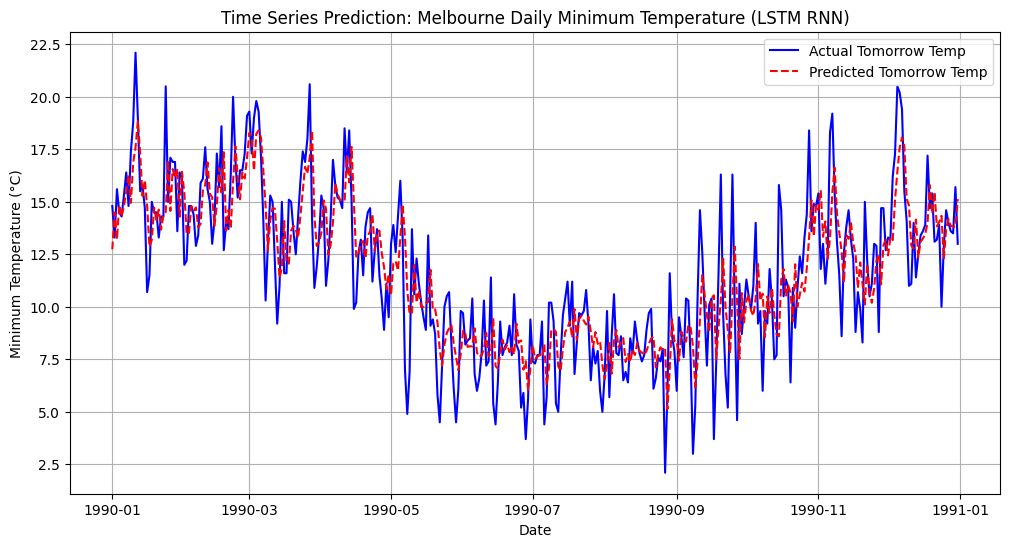

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sys
# --- New Deep Learning Imports ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Configuration ---
TARGET_COLUMN = 'Temp'
WEATHER_URL = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
TIME_STEPS = 7 # The number of previous days to use in the prediction sequence
TEST_SIZE = 0.2
df = None

print(f"Starting FINAL Robust Weather Prediction Model (LSTM RNN)...")

# --- 1. Data Acquisition (Robust URL Load) ---
try:
    df = pd.read_csv(WEATHER_URL, header=0, index_col=0)
    df = df.rename(columns={'Temp': TARGET_COLUMN})
    df.index = pd.to_datetime(df.index)
    print(f"Data loaded successfully. Total rows: {len(df)}")
except Exception as e:
    print(f" CRITICAL ERROR: Could not load data from URL. Details: {e}")
    sys.exit(1)

# --- 2. Data Preprocessing for LSTM ---

# A. Normalization (CRITICAL for Neural Networks)
# LSTMs perform best when data is scaled between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[TARGET_COLUMN].values.reshape(-1, 1))

# B. Sequence Creation (Converting 2D data to 3D for LSTM)
def create_sequences(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        # Input sequence (e.g., 7 days)
        X.append(data[i:(i + steps), 0])
        # Target (the day after the sequence)
        y.append(data[i + steps, 0])
    return np.array(X), np.array(y)

X_sequences, y_targets = create_sequences(df_scaled, TIME_STEPS)

# C. Reshape for LSTM: [samples, time_steps, features]
# Features here is 1 (only min temp is used)
X = X_sequences.reshape(X_sequences.shape[0], X_sequences.shape[1], 1)
y = y_targets

print(f"Data restructured for LSTM: X shape {X.shape}, y shape {y.shape}")


# --- 3. Split Data (Sequential Split is Mandatory) ---
data_size = len(X)
train_size = int(data_size * (1 - TEST_SIZE))
val_size = int(data_size * (TEST_SIZE / 2)) # Use half of the test set for validation

# Training set (Oldest data)
X_train = X[:train_size]
y_train = y[:train_size]

# Validation set (Mid-range data)
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

# Test set (Newest data)
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print(f"Data split: Train {len(X_train)}, Validation {len(X_val)}, Test {len(X_test)}")


# --- 4. Build and Train LSTM Model ---

# A. Model Architecture
model = Sequential([
    # Input layer: LSTM layer that processes sequences of length TIME_STEPS (7)
    LSTM(50, activation='relu', input_shape=(TIME_STEPS, 1), return_sequences=True),
    Dropout(0.2),
    # Additional LSTM layer for complexity
    LSTM(50, activation='relu'),
    Dropout(0.2),
    # Output layer: Dense layer for a single prediction (tomorrow's temperature)
    Dense(1)
])

# B. Compile and Train
model.compile(optimizer='adam', loss='mse')

# Use Early Stopping to prevent overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("Model training initiated (This may take a moment)...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[callback],
    verbose=0
)
print("Model training complete.")


# --- 5. Prediction and Evaluation ---

# A. Predict on the Test Set
y_pred_scaled = model.predict(X_test)

# B. Inverse Transform (Convert predictions back to original temperature scale)
y_pred_1d = scaler.inverse_transform(y_pred_scaled).flatten()
y_test_1d = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# C. Calculate Metrics
mse = mean_squared_error(y_test_1d, y_pred_1d)
r2 = r2_score(y_test_1d, y_pred_1d)

print("\n Model Evaluation on Test Set (LSTM RNN):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


# --- 6. Visualize Results ---
# Match the test predictions back to the date index
test_dates = df.index[train_size + val_size + TIME_STEPS:] # Offset index due to sequence creation

results_df = pd.DataFrame(
    {'Actual Tomorrow Temp': y_test_1d, 'Predicted Tomorrow Temp': y_pred_1d},
    index=test_dates
)

plt.figure(figsize=(12, 6))
# Plot the entire test period
plt.plot(results_df.index, results_df['Actual Tomorrow Temp'], label='Actual Tomorrow Temp', color='blue')
plt.plot(results_df.index, results_df['Predicted Tomorrow Temp'], label='Predicted Tomorrow Temp', color='red', linestyle='--')
plt.title('Time Series Prediction: Melbourne Daily Minimum Temperature (LSTM RNN)')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

Starting FINAL Robust Weather Prediction Model (Multivariate LSTM RNN)...
Data loaded successfully. Total rows: 3650
Using 4 features for prediction.
Data restructured for LSTM: X shape (3643, 7, 4), y shape (3643,)
Data split: Train 2914, Validation 364, Test 365
Model training initiated (This may take a moment)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete.
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

 Model Evaluation on Test Set (Multivariate LSTM RNN):
Mean Squared Error (MSE): 4.8951
R-squared (R2 Score): 0.6708


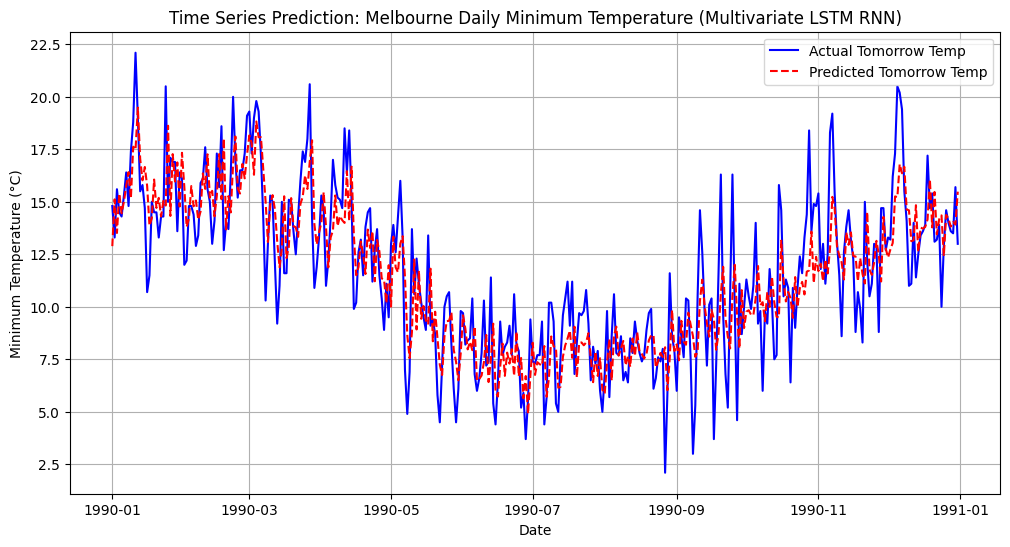

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sys
# --- New Deep Learning Imports ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Configuration ---
TARGET_COLUMN = 'Temp'
WEATHER_URL = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
TIME_STEPS = 7 # The number of previous days to use in the prediction sequence
TEST_SIZE = 0.2
df = None

print(f"Starting FINAL Robust Weather Prediction Model (Multivariate LSTM RNN)...")

# --- 1. Data Acquisition (Robust URL Load) ---
try:
    df = pd.read_csv(WEATHER_URL, header=0, index_col=0)
    df = df.rename(columns={'Temp': TARGET_COLUMN})
    df.index = pd.to_datetime(df.index)
    print(f"Data loaded successfully. Total rows: {len(df)}")
except Exception as e:
    print(f"❌ CRITICAL ERROR: Could not load data from URL. Details: {e}")
    sys.exit(1)

# --- NEW: Feature Engineering for Multivariate Input ---

# 1. Create Time-based Features (to capture seasonality)
df['DayOfYear'] = df.index.dayofyear
df['Month_sin'] = np.sin(2 * np.pi * df.index.month / 12)
df['Month_cos'] = np.cos(2 * np.pi * df.index.month / 12)
# The full feature set now includes the temperature and seasonal features
FEATURES = [TARGET_COLUMN, 'DayOfYear', 'Month_sin', 'Month_cos']
print(f"Using {len(FEATURES)} features for prediction.")

# --- 2. Data Preprocessing for LSTM ---

# A. Normalization (CRITICAL for Neural Networks)
# Fit the scaler on ALL features
scaler = MinMaxScaler(feature_range=(0, 1))
# Reshape the entire feature DataFrame
df_scaled = scaler.fit_transform(df[FEATURES].values)

# B. Sequence Creation (Converting 2D data to 3D for LSTM)
def create_sequences(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        # Input sequence: ALL scaled features for 'steps' days
        X.append(data[i:(i + steps)])
        # Target: ONLY the minimum temperature (TARGET_COLUMN is at index 0)
        y.append(data[i + steps, 0])
    return np.array(X), np.array(y)

X_sequences, y_targets = create_sequences(df_scaled, TIME_STEPS)

# C. Reshape for LSTM: [samples, time_steps, features] (X is already in 3D now)
X = X_sequences
y = y_targets

print(f"Data restructured for LSTM: X shape {X.shape}, y shape {y.shape}")


# --- 3. Split Data (Sequential Split is Mandatory) ---
data_size = len(X)
train_size = int(data_size * (1 - TEST_SIZE))
val_size = int(data_size * (TEST_SIZE / 2)) # Use half of the test set for validation

# Training set (Oldest data)
X_train = X[:train_size]
y_train = y[:train_size]

# Validation set (Mid-range data)
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

# Test set (Newest data)
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print(f"Data split: Train {len(X_train)}, Validation {len(X_val)}, Test {len(X_test)}")


# --- 4. Build and Train LSTM Model ---

# The input_shape must now be (TIME_STEPS, number of FEATURES)
n_features = X.shape[2]

# A. Model Architecture
model = Sequential([
    # Input layer: processes sequences of length TIME_STEPS and n_features (4)
    LSTM(64, activation='relu', input_shape=(TIME_STEPS, n_features), return_sequences=True), # Increased units
    Dropout(0.2),
    # Additional LSTM layer
    LSTM(64, activation='relu'), # Increased units
    Dropout(0.2),
    # Output layer: Dense layer for a single prediction
    Dense(1)
])

# B. Compile and Train
model.compile(optimizer='adam', loss='mse')

# Use Early Stopping to prevent overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("Model training initiated (This may take a moment)...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[callback],
    verbose=0
)
print("Model training complete.")


# --- 5. Prediction and Evaluation ---

# A. Predict on the Test Set
y_pred_scaled = model.predict(X_test)

# B. Inverse Transform (Convert predictions back to original temperature scale)
# IMPORTANT: When inverse transforming, we must create a dummy array with the same
# number of columns (n_features) that the scaler was fit on.

# 1. Create a placeholder array for predictions
# Use the correct size for the second dimension (n_features)
placeholder_pred = np.zeros((len(y_pred_scaled), n_features))
# 2. Put the scaled predictions into the first column (where 'Temp' was)
placeholder_pred[:, 0] = y_pred_scaled.flatten()
# 3. Inverse transform the entire placeholder
y_pred_1d = scaler.inverse_transform(placeholder_pred)[:, 0]


# 1. Create a placeholder array for actual values
placeholder_test = np.zeros((len(y_test), n_features))
# 2. Put the scaled actual values into the first column
placeholder_test[:, 0] = y_test
# 3. Inverse transform the entire placeholder
y_test_1d = scaler.inverse_transform(placeholder_test)[:, 0]

# C. Calculate Metrics
mse = mean_squared_error(y_test_1d, y_pred_1d)
r2 = r2_score(y_test_1d, y_pred_1d)

print("\n Model Evaluation on Test Set (Multivariate LSTM RNN):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


# --- 6. Visualize Results ---
# Match the test predictions back to the date index
# The total number of rows lost due to sequence creation is TIME_STEPS (7)
total_lost_rows = TIME_STEPS
test_dates = df.index[train_size + val_size + total_lost_rows:]

results_df = pd.DataFrame(
    {'Actual Tomorrow Temp': y_test_1d, 'Predicted Tomorrow Temp': y_pred_1d},
    index=test_dates
)

plt.figure(figsize=(12, 6))
# Plot the entire test period
plt.plot(results_df.index, results_df['Actual Tomorrow Temp'], label='Actual Tomorrow Temp', color='blue')
plt.plot(results_df.index, results_df['Predicted Tomorrow Temp'], label='Predicted Tomorrow Temp', color='red', linestyle='--')
plt.title('Time Series Prediction: Melbourne Daily Minimum Temperature (Multivariate LSTM RNN)')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()